In [18]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import cv2
import os
import torch
import yaml
from ultralytics import YOLO
import yaml

In [20]:
data_path='/kaggle/input/trees-detection/trees detection'

In [21]:
train=os.path.join(data_path, 'train')

In [22]:
test=os.path.join(data_path,'test')

In [23]:
valid=os.path.join(data_path,'valid')

In [24]:
out_path=os.path.join(data_path,'output')

In [25]:
folders = ['images', 'labels']
print("Data Path: {}\nTrain Path: {}\nValid Path: {}\nTest Path: {}\nOutput Path: {}".format(data_path, train, valid, test, out_path))

Data Path: /kaggle/input/trees-detection/trees detection
Train Path: /kaggle/input/trees-detection/trees detection/train
Valid Path: /kaggle/input/trees-detection/trees detection/valid
Test Path: /kaggle/input/trees-detection/trees detection/test
Output Path: /kaggle/input/trees-detection/trees detection/output


In [26]:
train_dict = dict(train=0, valid=1, test=2)
path_dict = [train, valid, test]
class_names = ['Tree', '0']
class_dict = dict(zip(range(len(class_names)), class_names))
print(class_dict)

{0: 'Tree', 1: '0'}


In [28]:
ppe_data = dict(train = train,
                    val = valid,
                    test = test,
                   nc = len(class_names),
                   names = class_names)
with open('ppe_dat.yaml', 'w') as output:
    yaml.dump(ppe_data, output, default_flow_style = True)

In [29]:
ppe_data

{'train': '/kaggle/input/trees-detection/trees detection/train',
 'val': '/kaggle/input/trees-detection/trees detection/valid',
 'test': '/kaggle/input/trees-detection/trees detection/test',
 'nc': 2,
 'names': ['Tree', '0']}

In [30]:
model = YOLO("//kaggle/input/trees-detection/trees detection/yolov8.yaml")

WARNING ⚠️ no model scale passed. Assuming scale='n'.


In [31]:
model = YOLO("/kaggle/input/trees-detection/trees detection/yolov8n.pt")

In [32]:
model = YOLO("//kaggle/input/trees-detection/trees detection/yolov8.yaml").load("/kaggle/input/trees-detection/trees detection/yolov8n.pt")

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 355/355 items from pretrained weights


In [33]:
torch.cuda.empty_cache()

In [34]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [35]:
os.environ["WANDB_MODE"] = "disabled"

In [36]:
results = model.train(data="/kaggle/working/ppe_data.yaml", epochs=100, imgsz=640,device=[0,1])

Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=//kaggle/input/trees-detection/trees detection/yolov8.yaml, data=/kaggle/working/ppe_data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=/kaggle/input/trees-detection/trees detection/yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

100%|██████████| 755k/755k [00:00<00:00, 6.69MB/s]
2024-11-17 20:39:57,504	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-17 20:39:58,324	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]       

100%|██████████| 5.35M/5.35M [00:00<00:00, 30.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/trees-detection/trees detection/train/labels... 238 images, 0 backgrounds, 0 corrupt: 100%|██████████| 238/238 [00:00<00:00, 426.57it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/trees-detection/trees detection/train is not writeable, cache not saved.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/trees-detection/trees detection/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 350.86it/s]
train: Scanning /kaggle/input/trees-detection/trees detection/train/labels... 72 images, 0 backgrounds, 0 corrupt:  30%|███       | 72/238 [00:00<00:00, 716.55it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: WARNING ⚠️ Cache directory /kaggle/input/trees-detection/trees detection/valid is not writeable, cache not saved.


train: Scanning /kaggle/input/trees-detection/trees detection/train/labels... 238 images, 0 backgrounds, 0 corrupt: 100%|██████████| 238/238 [00:00<00:00, 794.36it/s]
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.22G      1.204      2.916      1.713         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                   all          7          7    0.00672          1      0.964      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.15G      1.096      2.217       1.65         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


                   all          7          7    0.00495          1      0.533      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.19G      1.107      1.796      1.647         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]


                   all          7          7    0.00443          1       0.92      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.15G      1.134      1.793      1.691         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


                   all          7          7      0.723      0.857      0.859      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.16G      1.178      1.688      1.648         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]


                   all          7          7     0.0896          1      0.467      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.16G       1.11      1.521      1.612         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]


                   all          7          7      0.599      0.714      0.683       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.15G      1.096      1.471       1.61         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]


                   all          7          7      0.858      0.714      0.866      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.16G      1.147      1.574      1.643         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


                   all          7          7      0.168      0.286      0.131     0.0709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.16G      1.161      1.565      1.701         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


                   all          7          7          1      0.274      0.389      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.16G      1.083      1.463      1.595         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.96it/s]


                   all          7          7      0.965          1      0.995      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.16G      1.144      1.447      1.625         16        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


                   all          7          7      0.861          1      0.924      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.16G      1.118       1.39      1.631         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


                   all          7          7      0.869          1      0.978      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.16G      1.119      1.366      1.656         14        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


                   all          7          7      0.748          1      0.909      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.16G      1.074      1.323      1.582         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


                   all          7          7      0.777      0.571      0.667      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.16G      1.037      1.406      1.545         19        640: 100%|██████████| 15/15 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


                   all          7          7      0.594      0.857      0.632      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.16G      0.991      1.298      1.557         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


                   all          7          7      0.976          1      0.995      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.15G      1.032      1.273      1.585         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


                   all          7          7      0.991          1      0.995      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.16G     0.9862        1.2      1.523         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]


                   all          7          7      0.985      0.857      0.953      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.15G      1.058      1.182       1.56         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]


                   all          7          7      0.635      0.993      0.707      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.16G      1.067      1.187      1.561         16        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]


                   all          7          7          1      0.987      0.995      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.16G     0.8917      1.116      1.441         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


                   all          7          7          1      0.974      0.995      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.16G     0.9845      1.126       1.53         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


                   all          7          7          1      0.991      0.995      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.16G     0.9999      1.098      1.519         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


                   all          7          7          1       0.85      0.953      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.16G      1.034      1.157      1.558         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


                   all          7          7      0.993          1      0.995      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.16G     0.9884      1.151      1.527         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


                   all          7          7      0.991          1      0.995      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.16G     0.9995       1.09      1.489         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]


                   all          7          7      0.992          1      0.995      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.16G     0.9359      1.065      1.477         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]


                   all          7          7      0.991          1      0.995      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.16G      1.015      1.059      1.498         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]


                   all          7          7      0.989          1      0.995      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.16G     0.9178     0.9939       1.49         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]


                   all          7          7      0.989          1      0.995      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.16G     0.8882      1.006      1.438         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]


                   all          7          7      0.862          1      0.978      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.16G     0.8938     0.9235      1.408         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]


                   all          7          7      0.972          1      0.995      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.16G     0.9305      0.942      1.439         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]


                   all          7          7      0.965          1      0.995      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.16G     0.8742      0.919      1.439         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


                   all          7          7      0.985          1      0.995      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.16G     0.8993     0.9313      1.391         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


                   all          7          7          1      0.992      0.995      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.15G     0.9711     0.9486      1.457         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


                   all          7          7      0.872      0.977      0.924      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.16G     0.9556     0.9599      1.495         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]


                   all          7          7      0.866          1      0.978      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.16G     0.9168     0.9619      1.419         15        640: 100%|██████████| 15/15 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


                   all          7          7      0.993          1      0.995      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.16G     0.8745     0.8704      1.396         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]


                   all          7          7          1      0.996      0.995      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.15G     0.8678     0.8409      1.423         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]


                   all          7          7          1      0.994      0.995      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.16G     0.8858     0.8984      1.394         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


                   all          7          7      0.996          1      0.995      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.16G     0.8457     0.8675      1.381         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]


                   all          7          7      0.994          1      0.995      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.16G     0.8593     0.8457      1.362         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


                   all          7          7      0.991          1      0.995      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.15G     0.8471     0.8606      1.419         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]


                   all          7          7          1      0.997      0.995      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.15G     0.9312     0.9823      1.457         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]


                   all          7          7      0.844      0.857      0.869      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.16G     0.8387      0.857      1.384         18        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


                   all          7          7          1      0.995      0.995      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.16G     0.8104     0.8024      1.362         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]


                   all          7          7      0.993          1      0.995      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.15G     0.8074     0.8506       1.35         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


                   all          7          7          1      0.999      0.995      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.16G      0.858     0.8327       1.41         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]


                   all          7          7          1      0.992      0.995      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.16G     0.8338     0.8068      1.374         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


                   all          7          7      0.992      0.857      0.937       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.15G     0.7643     0.7821      1.332         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


                   all          7          7      0.991      0.857      0.978      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.15G      0.808      0.794      1.363         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.96it/s]


                   all          7          7          1      0.997      0.995      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.16G     0.7856     0.7849      1.368         14        640: 100%|██████████| 15/15 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]


                   all          7          7      0.994          1      0.995       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.16G      0.792     0.7464       1.33         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


                   all          7          7      0.991          1      0.995      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.15G     0.7781     0.7653      1.307         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


                   all          7          7      0.991          1      0.995      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.16G     0.7458     0.7378      1.299         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


                   all          7          7      0.983      0.857      0.964      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.16G     0.7892     0.7842       1.36         14        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]


                   all          7          7      0.993          1      0.995      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.16G     0.8016     0.7662      1.335         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


                   all          7          7      0.993          1      0.995      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.16G     0.7402     0.7085      1.308         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


                   all          7          7      0.997          1      0.995      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.15G       0.78     0.7582      1.332         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]


                   all          7          7          1      0.994      0.995      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.16G     0.7218     0.7301       1.31         20        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]


                   all          7          7          1      0.991      0.995       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.16G     0.7553     0.7405      1.329         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]


                   all          7          7      0.992      0.857      0.978      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.15G     0.7267     0.6771      1.321         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


                   all          7          7      0.991      0.857      0.953      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.16G     0.7204     0.6985      1.267         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]


                   all          7          7      0.989          1      0.995       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.16G     0.7183     0.6988      1.294         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]


                   all          7          7       0.99          1      0.995       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.16G     0.7135     0.6399      1.299         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


                   all          7          7      0.983          1      0.995      0.881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.16G     0.7798     0.7461      1.328         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]


                   all          7          7       0.99          1      0.995      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.15G     0.7436     0.6983      1.287         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]


                   all          7          7          1      0.992      0.995      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.16G     0.7848     0.7046      1.337         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


                   all          7          7      0.982          1      0.995      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.16G     0.7181     0.7019      1.282         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


                   all          7          7      0.989          1      0.995      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.16G     0.7211     0.6263      1.292         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


                   all          7          7      0.992          1      0.995       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.15G     0.7045      0.694      1.277         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


                   all          7          7       0.99          1      0.995        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.16G     0.7117     0.6462      1.274         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]


                   all          7          7      0.964          1      0.995      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.16G     0.6755      0.624      1.252         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


                   all          7          7       0.87          1      0.978      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.16G     0.7446     0.6721      1.316         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]


                   all          7          7      0.871          1      0.978      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.15G     0.6521     0.6467      1.263         16        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


                   all          7          7      0.873          1      0.978      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.16G     0.6538     0.6168      1.246         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


                   all          7          7      0.858          1      0.978      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.16G     0.7168     0.6694      1.307         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]


                   all          7          7          1      0.995      0.995      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.16G     0.7183     0.6617      1.285         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.94it/s]


                   all          7          7      0.867          1      0.978       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.15G     0.6362     0.6232       1.24         16        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]


                   all          7          7          1      0.984      0.995      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.16G     0.6119     0.5537      1.214         14        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


                   all          7          7      0.993          1      0.995      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.16G     0.6924     0.6588      1.258         16        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]


                   all          7          7      0.992          1      0.995      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.16G     0.6438     0.6282      1.238         17        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]


                   all          7          7       0.99          1      0.995      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.16G     0.6269     0.5977      1.218         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]


                   all          7          7       0.99          1      0.995      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.16G     0.5961     0.5784      1.199         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


                   all          7          7      0.991          1      0.995      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.16G     0.5838      0.594      1.213         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


                   all          7          7      0.992          1      0.995      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.16G     0.6583     0.6181      1.244         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


                   all          7          7      0.993          1      0.995      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.15G     0.6059     0.6157        1.2         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


                   all          7          7      0.993          1      0.995      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.16G     0.6184     0.6142       1.22         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.92it/s]


                   all          7          7      0.993          1      0.995      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.16G      0.669     0.6384      1.256         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


                   all          7          7      0.993          1      0.995      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.16G     0.6475     0.6087       1.23         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


                   all          7          7      0.993          1      0.995      0.887
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
     91/100      1.15G     0.5541     0.7719      1.323          7        640: 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]


                   all          7          7      0.994          1      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.16G     0.5032     0.6439      1.252          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]


                   all          7          7      0.994          1      0.995      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.15G     0.4772     0.6084      1.199          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


                   all          7          7      0.994          1      0.995      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.15G     0.4526     0.5289      1.175          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


                   all          7          7      0.993          1      0.995      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.15G     0.5139     0.5868       1.28          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.94it/s]


                   all          7          7      0.994          1      0.995      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.16G     0.4739     0.5268      1.205          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]


                   all          7          7      0.993          1      0.995      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.15G      0.437     0.5131      1.177          7        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


                   all          7          7      0.994          1      0.995      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.16G     0.4511     0.5164      1.184          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]


                   all          7          7      0.994          1      0.995      0.886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.15G     0.4658      0.549      1.187          7        640: 100%|██████████| 15/15 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


                   all          7          7      0.994          1      0.995      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.15G     0.3728     0.4983      1.089          9        640: 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]


                   all          7          7      0.994          1      0.995      0.891

100 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLOv8 summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]


                   all          7          7       0.99          1      0.995      0.922
                  Tree          7          7       0.99          1      0.995      0.922
Speed: 1.1ms preprocess, 5.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


In [37]:
model_1 = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [55]:
result_3 = model_1("/kaggle/input/treees/ad46dbb447cd0e9a6aeecd64cc2bd332b0cbcb79.jpeg")


image 1/1 /kaggle/input/treees/ad46dbb447cd0e9a6aeecd64cc2bd332b0cbcb79.jpeg: 448x640 1 0, 49.8ms
Speed: 2.4ms preprocess, 49.8ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.8769], device='cuda:0')
data: tensor([[5.9073e+01, 8.4841e+01, 9.8207e+02, 6.4764e+02, 8.7692e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (680, 1023)
shape: torch.Size([1, 6])
xywh: tensor([[520.5707, 366.2385, 922.9947, 562.7957]], device='cuda:0')
xywhn: tensor([[0.5089, 0.5386, 0.9022, 0.8276]], device='cuda:0')
xyxy: tensor([[ 59.0733,  84.8406, 982.0680, 647.6363]], device='cuda:0')
xyxyn: tensor([[0.0577, 0.1248, 0.9600, 0.9524]], device='cuda:0')


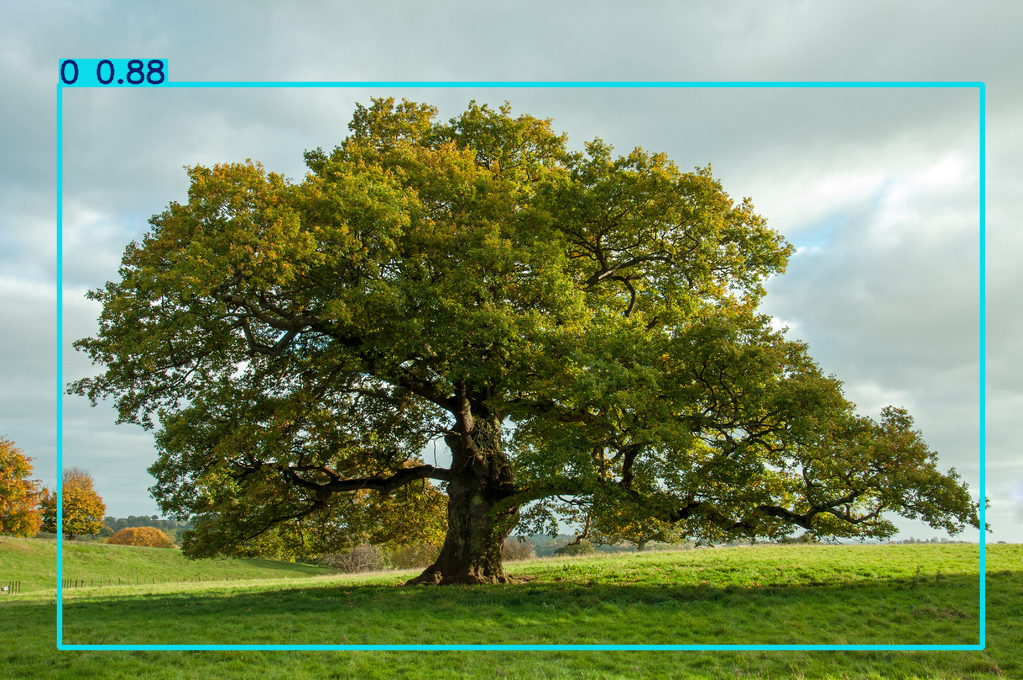

In [56]:
for result in result_3:
    print(result.boxes)
    result.show()
    result.save(filename="afeter.jpg")